In [122]:
import pandas as pd 
import numpy as np 
from scipy.sparse import bsr_matrix
import matplotlib.pyplot as plt

In [123]:
pd.options.display.max_rows = 500

In [124]:
anime = pd.read_csv('../data/datasets_571_1094_anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [125]:
rating = pd.read_csv('../data/rating_1.csv')
rating.head()

,user_id,anime_id,rating
0,1,8074,10
1,1,11617,10
2,1,11757,10
3,1,15451,10
4,2,11771,10


In [126]:
rating.shape

(6337241, 3)

In [127]:
neg_rating = rating[rating['rating']==-1]
neg_rating.shape

(0, 3)

In [128]:
print('Percent of -1 in rating: ',neg_rating.shape[0]/rating.shape[0]*100)

Percent of -1 in rating:  0.0


In [129]:
print('Data points without -1', rating.shape[0]-neg_rating.shape[0])

Data points without -1 6337241


In [130]:
user_1 = neg_rating[neg_rating['user_id']==1]
user_1.shape

(0, 3)

In [131]:
user_1_all = rating[rating['user_id']==1]
user_1_all.shape

(4, 3)

### probably just remove all the -1 and maybe make a sparse matrix 
### see how to use scipy sparse and be able to use it to train a model 
### turn genre into tags for better features

In [132]:
len(anime['anime_id'].unique())

12294

In [133]:
rating.describe()

,user_id,anime_id,rating
count,6.337241e+06,6.337241e+06,6.337241e+06
mean,3.674791e+04,8.902866e+03,7.808497e+00
std,2.101340e+04,8.882000e+03,1.572496e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.898400e+04,1.239000e+03,7.000000e+00
50%,3.681500e+04,6.213000e+03,8.000000e+00
75%,5.487300e+04,1.407500e+04,9.000000e+00
max,7.351600e+04,3.447500e+04,1.000000e+01


#### How many ratings do people give on average 

In [134]:
user_ids = rating['user_id'].unique()

In [135]:
grp_rating = rating.groupby(by='user_id')

In [136]:
user_ratings = grp_rating.size()

In [137]:
user_ratings.describe()

count    69600.000000
mean        91.052313
std        135.764253
min          1.000000
25%         13.000000
50%         45.000000
75%        114.000000
max       3747.000000
dtype: float64

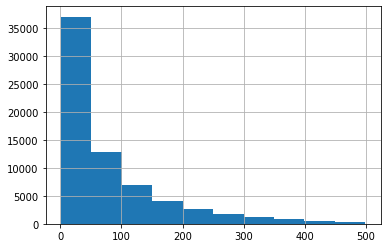

In [138]:
user_ratings[user_ratings<500].hist()

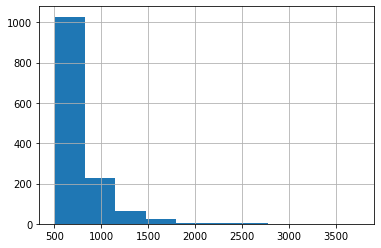

In [139]:
user_big = user_ratings[user_ratings>500]
user_big[user_big<9000].hist()

In [147]:
rating[rating['user_id']==42635]

,user_id,anime_id,rating
3632834,42635,1,8
3632835,42635,5,9
3632836,42635,6,9
3632837,42635,7,7
3632838,42635,8,6
...,...,...,...
3636576,42635,32491,7
3636577,42635,32566,7
3636578,42635,32668,7
3636579,42635,32889,5
